## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Stock market prediction/TESLA.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3632,2024-12-03,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,2024-12-04,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,2024-12-05,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,2024-12-06,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


## Basic checks

In [ ]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
3632,3632,12/3/24,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,3633,12/4/24,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,3634,12/5/24,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,3635,12/6/24,377.420013,389.489990,370.799988,389.220001,389.220001,81455800
3636,3636,12/9/24,397.609985,404.799988,378.010010,389.790008,389.790008,96359200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3637 non-null   int64  
 1   Date        3637 non-null   object 
 2   Open        3637 non-null   float64
 3   High        3637 non-null   float64
 4   Low         3637 non-null   float64
 5   Close       3637 non-null   float64
 6   Adj Close   3637 non-null   float64
 7   Volume      3637 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 227.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3.637000e+03
mean,1818.000000,80.080574,81.832710,78.219276,80.067952,80.067952,9.667330e+07
std,1050.055792,105.466131,107.807170,102.931208,105.409448,105.409448,7.787314e+07
min,0.000000,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,909.000000,12.046667,12.320000,11.746667,12.065333,12.065333,4.868250e+07
50%,1818.000000,17.833332,18.080000,17.563999,17.846666,17.846666,8.198100e+07
75%,2727.000000,176.070007,179.770004,173.169998,176.880005,176.880005,1.223940e+08
max,3636.000000,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Data Preprocessing

In [ ]:
# Drop the 'Unnamed: 0' column as it is redundant

df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# convert 'Date' column to datetime

df['Date']= pd.to_datetime(df['Date'])

In [ ]:
# Check for missing value

df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
# Checking unique value

df.duplicated().sum()

np.int64(0)

## EDA

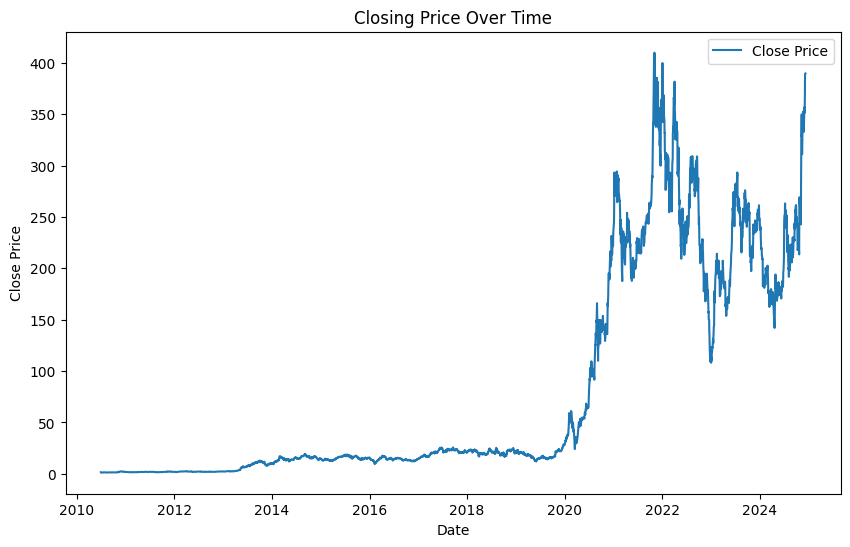

In [ ]:
# Plotting the closing price over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='Close', label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

* The plot shows stable closing prices from 2010 to 2019, followed by a sharp rise around 2020 and high volatility afterward. A strong recovery trend is observed in 2024–2025, indicating renewed investor interest.

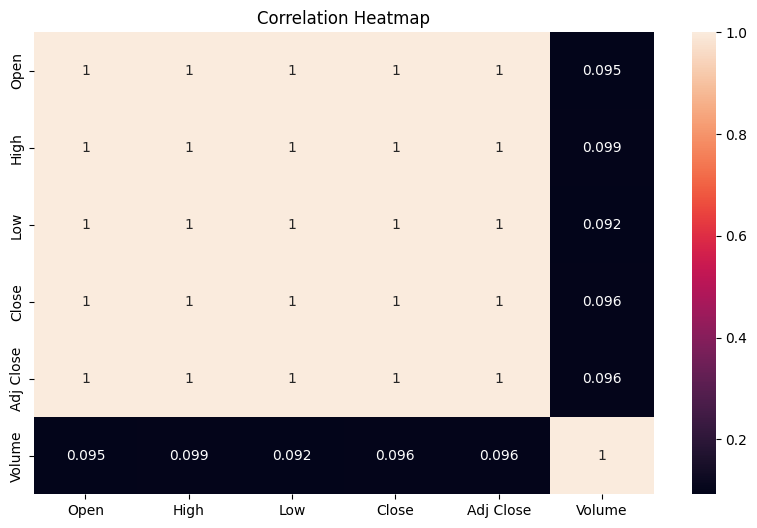

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

* Its shows that all columns are highly corelerated with each other except volume.

In [ ]:
df1 = df[['Date','Close']]
df1.head()

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [ ]:
df1.set_index('Date', inplace=True)

In [ ]:
df1

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2024-12-03,351.420013
2024-12-04,357.929993
2024-12-05,369.489990


In [ ]:
# stationary checking

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is non-stationary.')

adf_test(df1['Close'])

ADF Statistic: -0.14443766126985721
p-value: 0.9448285236295073
The series is non-stationary.


Differencing

In [ ]:
df1['First Difference'] = df1['Close'] - df1['Close'].shift(1)

In [ ]:
df1.head(4)

,Close,First Difference
Date,,
2010-06-29,1.592667,NaN
2010-06-30,1.588667,-0.004000
2010-07-01,1.464000,-0.124667
2010-07-02,1.280000,-0.184000


In [ ]:
df1['Seasonal Difference'] = df1['First Difference'] - df1['First Difference'].shift(12)

In [ ]:
df1.head(10)

,Close,First Difference,Seasonal Difference
Date,,,
2010-06-29,1.592667,NaN,NaN
2010-06-30,1.588667,-0.004000,NaN
2010-07-01,1.464000,-0.124667,NaN
2010-07-02,1.280000,-0.184000,NaN
2010-07-06,1.074000,-0.206000,NaN
2010-07-07,1.053333,-0.020667,NaN
2010-07-08,1.164000,0.110667,NaN
2010-07-09,1.160000,-0.004000,NaN
2010-07-12,1.136667,-0.023333,NaN


In [ ]:
# again do dickey fuller test

adf_test(df1['Seasonal Difference'].dropna())

ADF Statistic: -13.410259337195649
p-value: 4.388063098037993e-25
The series is stationary.


<Axes: xlabel='Date'>

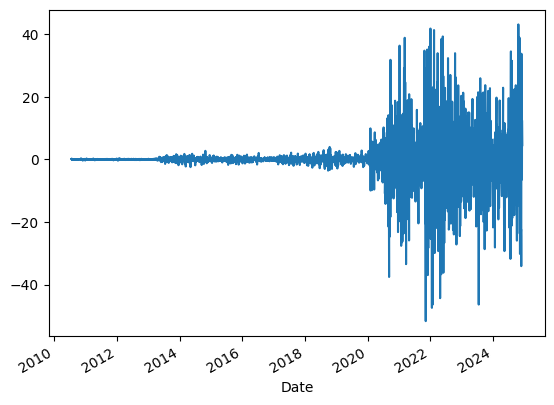

In [ ]:
df1['Seasonal Difference'].plot()

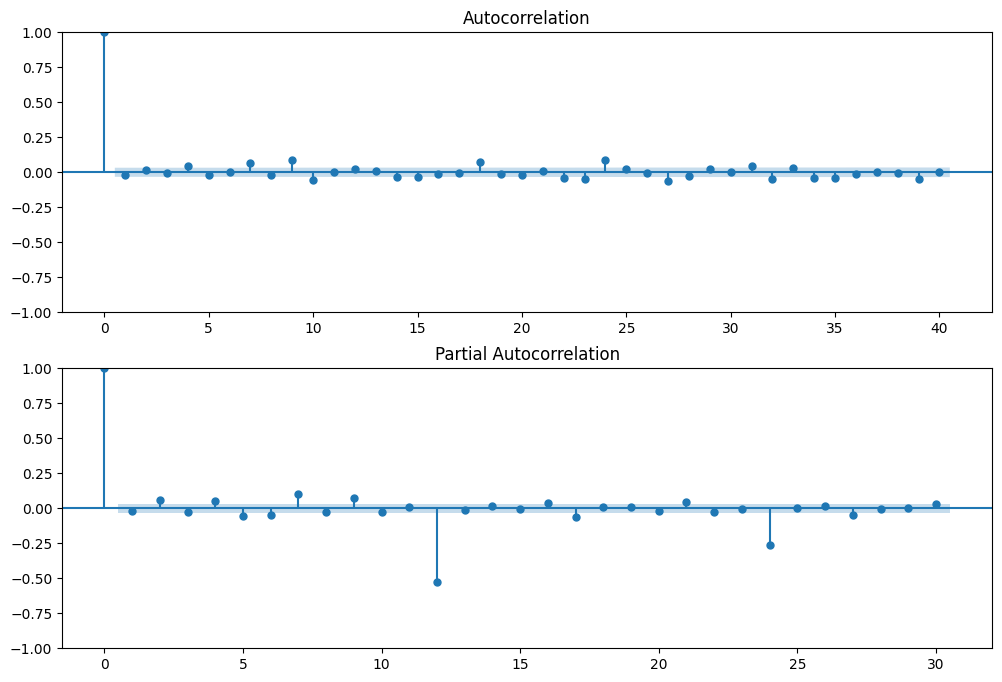

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm # Import the statsmodels library

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# Use the imported functions directly
fig = plot_acf(df1['First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
# Use the imported functions directly
fig = plot_pacf(df1['Seasonal Difference'].iloc[13:],lags=30,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0
# from statsmodels.tsa.arima_model import ARIMA # This is the old import
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df1['Close'],order=(1,1,0))
model_fit=model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3637
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -11048.306
Date:                Mon, 16 Jun 2025   AIC                          22100.612
Time:                        13:36:57   BIC                          22113.009
Sample:                             0   HQIC                         22105.027
                               - 3637                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0181      0.008     -2.162      0.031      -0.034      -0.002
sigma2        25.5160      0.194    131.246      0.000      25.135      25.897
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44537.65
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):            1114.15   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast_arima = model_fit.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


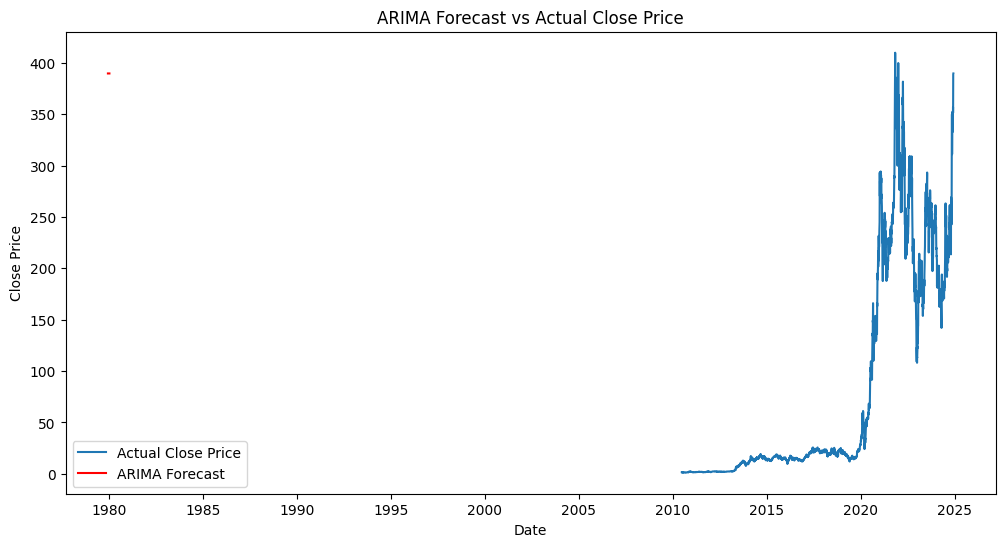

In [ ]:
# prompt: plot forecast line plot

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Actual Close Price')
plt.plot(forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

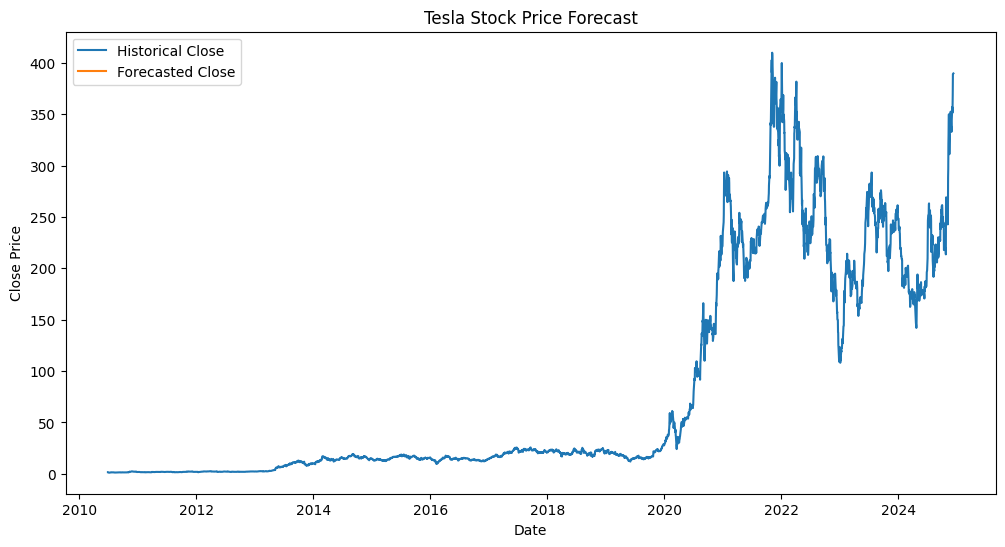

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Make predictions
# You need to specify the start and end dates for your predictions
# For example, predict the next 30 days starting from the end of your training data
start_index = len(df1)
end_index = len(df1) + 30

# Create future dates for forecasting
future_dates = pd.date_range(start=df1.index[-1], periods=31, freq='D')[1:]

# Use the fitted model to predict
predictions = model_fit.predict(start=start_index, end=end_index)

# Create a DataFrame for the predictions
forecast_df = pd.DataFrame(predictions, index=future_dates, columns=['Forecasted Close'])

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Historical Close')
plt.plot(forecast_df['Forecasted Close'], label='Forecasted Close')
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## **Sarima Model**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df1['Close'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit()


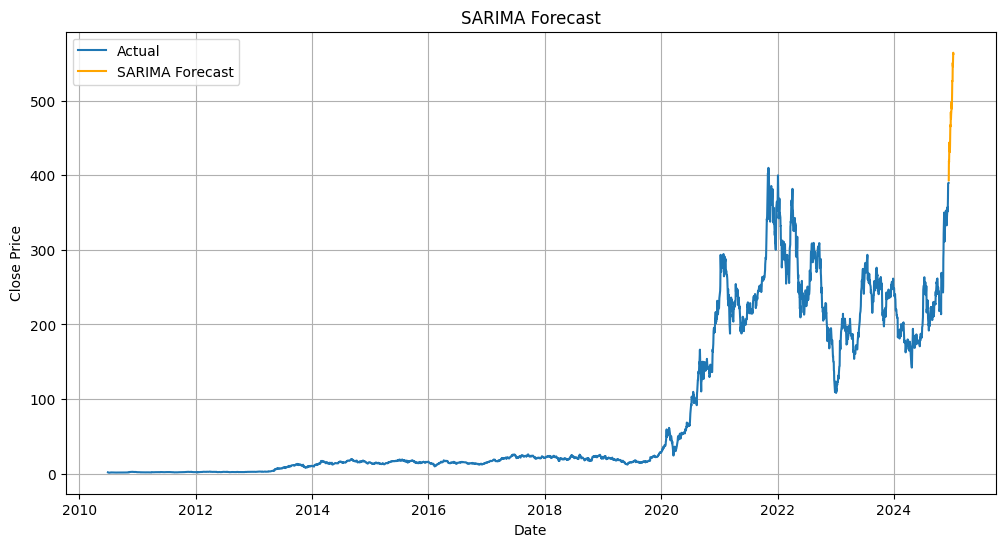

In [ ]:
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean

# Create forecast date index
forecast_index = pd.date_range(start=df1['Close'].index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df1['Close'], label='Actual')
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

## **Prophet** **Model**

In [ ]:
from prophet import Prophet

In [ ]:
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
model_prophet = Prophet()

In [ ]:
model_prophet.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiqw5n7r/0_pthe54.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiqw5n7r/fy4unwx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16006', 'data', 'file=/tmp/tmppiqw5n7r/0_pthe54.json', 'init=/tmp/tmppiqw5n7r/fy4unwx4.json', 'output', 'file=/tmp/tmppiqw5n7r/prophet_modelfl762rc7/prophet_model-20250616161644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:16:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model_prophet.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
prophet_df.tail()

,ds,y
3632,2024-12-03,351.420013
3633,2024-12-04,357.929993
3634,2024-12-05,369.489990
3635,2024-12-06,389.220001
3636,2024-12-09,389.790008


In [ ]:
# Create future dates for next 365 days

future_dates = model_prophet.make_future_dataframe(periods = 30)

In [ ]:
future_dates

,ds
0,2010-06-29
1,2010-06-30
2,2010-07-01
3,2010-07-02
4,2010-07-06
...,...
3662,2025-01-04
3663,2025-01-05
3664,2025-01-06
3665,2025-01-07


In [ ]:
prediction = model_prophet.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,-1.671780,-39.616038,29.884331,-1.671780,-1.671780,-3.934378,-3.934378,-3.934378,-0.696278,-0.696278,-0.696278,-3.238099,-3.238099,-3.238099,0.0,0.0,0.0,-5.606158
1,2010-06-30,-1.662304,-41.356471,28.488175,-1.662304,-1.662304,-3.308449,-3.308449,-3.308449,-0.580005,-0.580005,-0.580005,-2.728443,-2.728443,-2.728443,0.0,0.0,0.0,-4.970752
2,2010-07-01,-1.652827,-40.619162,30.136306,-1.652827,-1.652827,-3.098454,-3.098454,-3.098454,-0.892035,-0.892035,-0.892035,-2.206419,-2.206419,-2.206419,0.0,0.0,0.0,-4.751282
3,2010-07-02,-1.643351,-39.306341,32.728745,-1.643351,-1.643351,-2.763322,-2.763322,-2.763322,-1.085394,-1.085394,-1.085394,-1.677928,-1.677928,-1.677928,0.0,0.0,0.0,-4.406673
4,2010-07-06,-1.605447,-37.595050,30.229865,-1.605447,-1.605447,-0.324588,-0.324588,-0.324588,-0.696278,-0.696278,-0.696278,0.371690,0.371690,0.371690,0.0,0.0,0.0,-1.930035


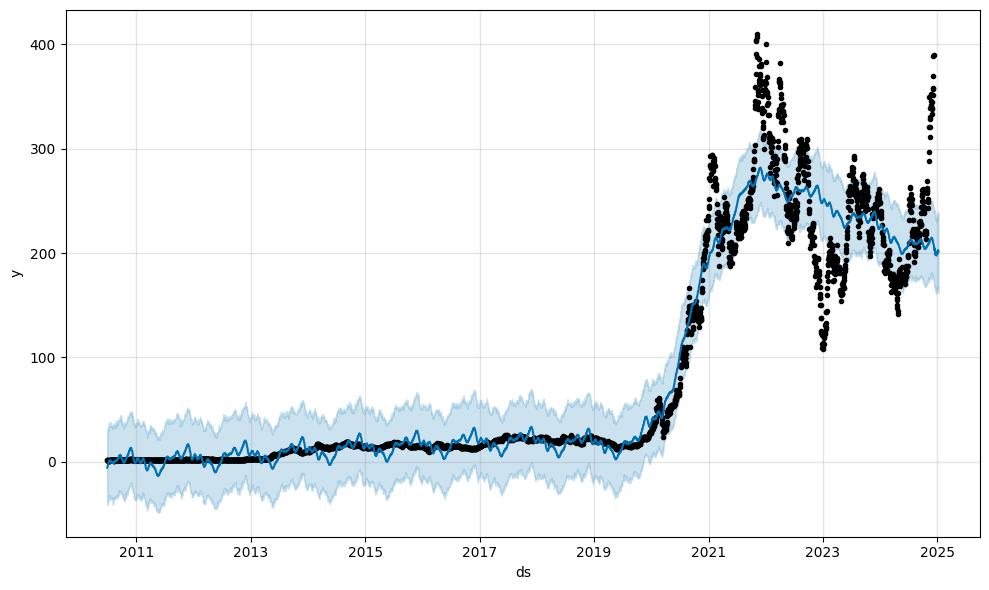

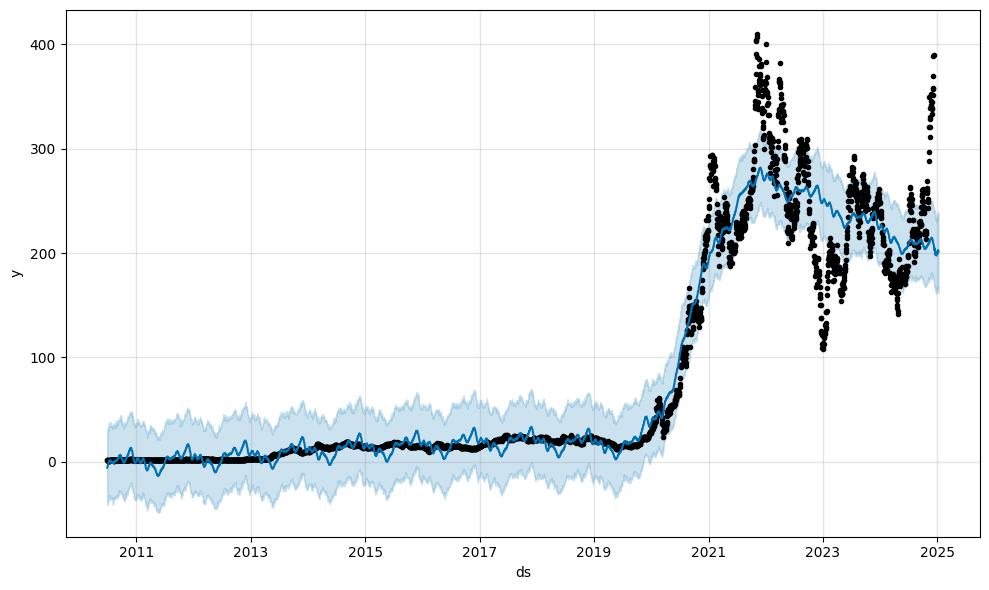

In [ ]:
model_prophet.plot(prediction)

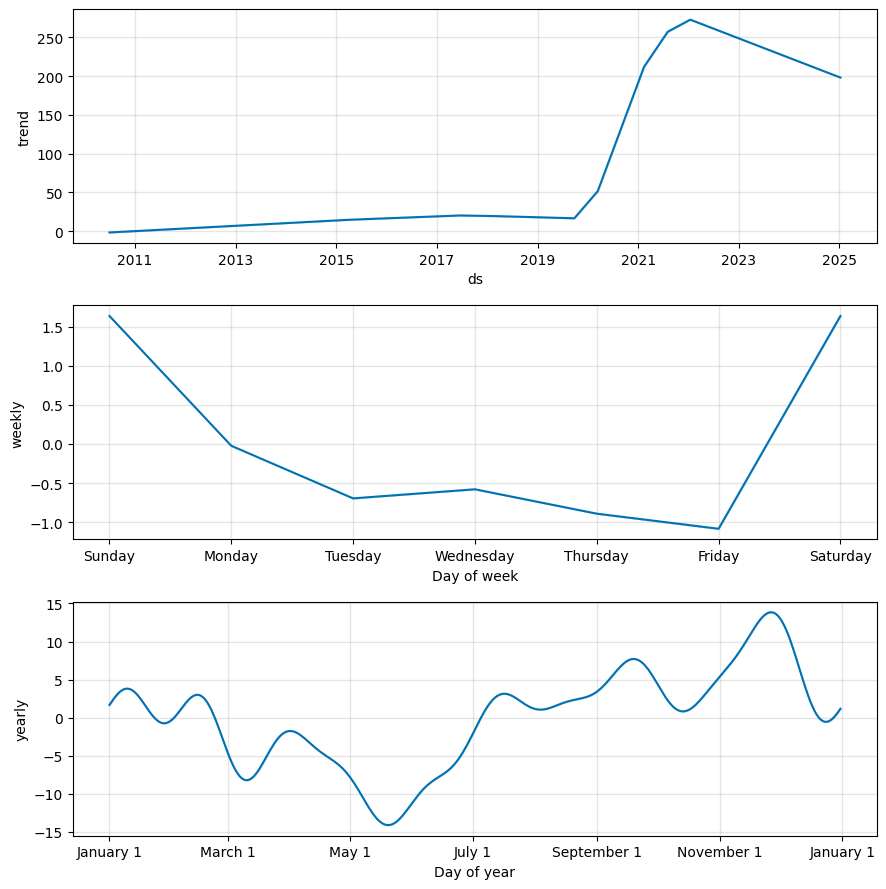

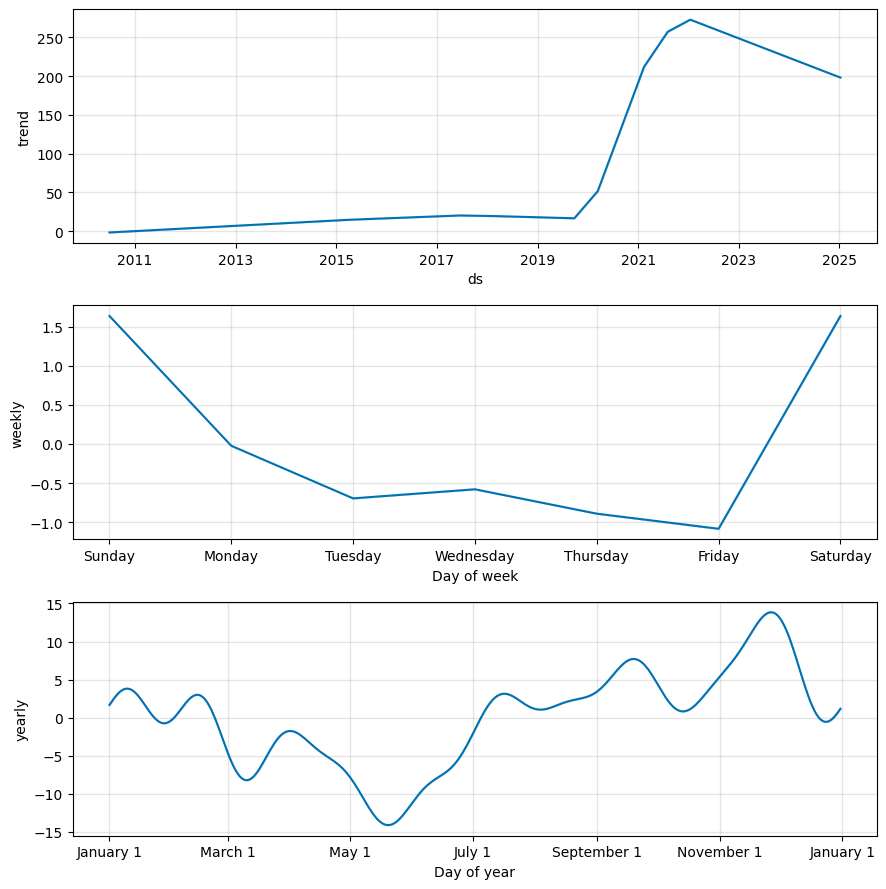

In [ ]:
# visualize each componenets

model_prophet.plot_components(prediction)

In [ ]:
# from fbprophet.diagnostics import cross_validation # This is the old import
from prophet.diagnostics import cross_validation # This is the updated import

df_cv = cross_validation(model_prophet, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 24 forecasts with cutoffs between 2012-08-09 00:00:00 and 2023-12-10 00:00:00


  0%|          | 0/24 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmppiqw5n7r/ha8iil_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiqw5n7r/wmxlvmsj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53723', 'data', 'file=/tmp/tmppiqw5n7r/ha8iil_x.json', 'init=/tmp/tmppiqw5n7r/wmxlvmsj.json', 'output', 'file=/tmp/tmppiqw5n7r/prophet_modelkt5vsi0m/prophet_model-20250616161733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiqw5n7r/tes45daj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppiqw5n7r/k31l2sxx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-08-10,1.826171,1.666467,1.983759,1.996000,2012-08-09
1,2012-08-13,1.794775,1.638200,1.960111,2.078000,2012-08-09
2,2012-08-14,1.788937,1.624848,1.945947,1.961333,2012-08-09
3,2012-08-15,1.783170,1.631797,1.942710,1.960000,2012-08-09
4,2012-08-16,1.776077,1.631298,1.921441,2.020000,2012-08-09


In [ ]:
# from fbprophet.diagnostics import performance_metrics # This is the old import
from prophet.diagnostics import performance_metrics # This is the updated import
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,3545.871387,59.547220,26.929651,0.248736,0.125455,0.240066,0.332504
1,38 days,3575.560151,59.795988,27.312610,0.250815,0.126220,0.243752,0.326285
2,39 days,3701.685230,60.841476,28.037706,0.255381,0.128924,0.247553,0.316652
3,40 days,3775.634625,61.446193,28.323730,0.257600,0.129968,0.249339,0.313847
4,41 days,3787.065579,61.539139,28.310628,0.257742,0.128924,0.249959,0.315091


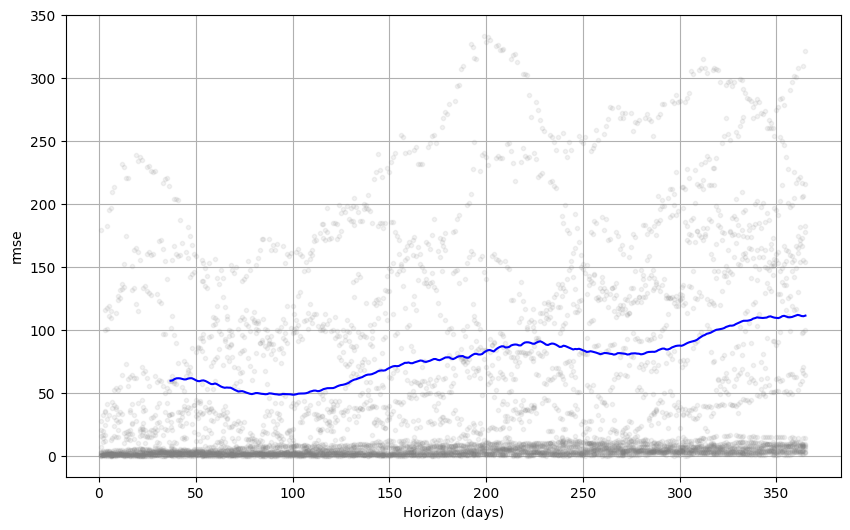

In [ ]:
# from fbprophet.plot import plot_cross_validation_metric # This is the old import
from prophet.plot import plot_cross_validation_metric # This is the updated import
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# **LSTM Model**

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3632,2024-12-03,351.799988,355.690002,348.200012,351.420013,351.420013,58267200
3633,2024-12-04,353.000000,358.100006,348.600006,357.929993,357.929993,50810900
3634,2024-12-05,359.869995,375.429993,359.500000,369.489990,369.489990,81403600
3635,2024-12-06,377.420013,389.489990,370.799988,389.220001,389.220001,81455800


In [ ]:
lstm_df=df.reset_index()['Close']

In [ ]:
lstm_df

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
3632,351.420013
3633,357.929993
3634,369.489990
3635,389.220001


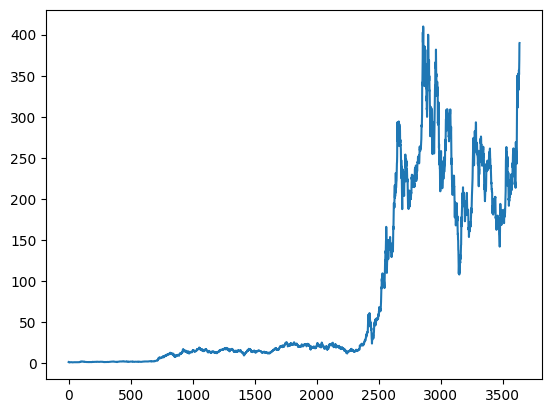

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lstm_df)

In [ ]:
# lstm are sensitive to datapoints so we ahve to scale the data

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(lstm_df).reshape(-1,1))

In [ ]:
print(df1)

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.9010067 ]
 [0.94925616]
 [0.95065011]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2364, 1273)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2263, 100)
(2263,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1172, 100)
(1172,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 3.3488e-04 - val_loss: 0.0180
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 1.4238e-05 - val_loss: 0.0122
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - loss: 8.9059e-06 - val_loss: 0.0116
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - loss: 9.6152e-06 - val_loss: 0.0095
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 9.0183e-06 - val_loss: 0.0098
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 8.5871e-06 - val_loss: 0.0083
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 1.0295e-05 - val_loss: 0.0090
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 8.3366e-06 - val_loss: 0.0079
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 8.1094e-06 - val_loss: 0.0085
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 7.0545e-06 - val_loss: 0.0072
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 6.9220e-06 - val_loss: 0

In [ ]:
import tensorflow as tf

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14.340014513832154

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

190.99593659180422

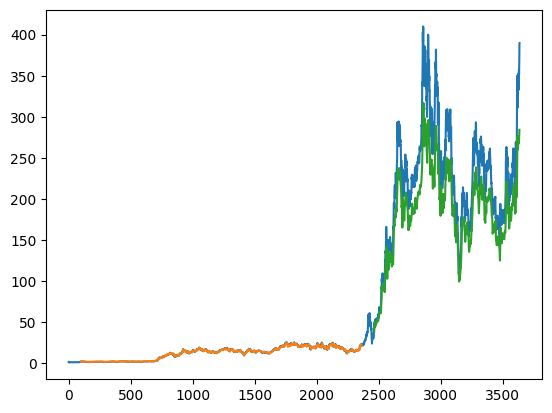

In [ ]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()